In [41]:
import pandas as pd
masses_data = pd.read_csv('mammographic_masses.data.txt', na_values=['?'], names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
masses_data.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [42]:
masses_data.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


If the missing data seems randomly distributed, go ahead and drop rows with missing data. Hint: use dropna().

In [43]:
masses_data.dropna(inplace=True)
masses_data.describe()

,BI-RADS,age,shape,margin,density,severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


Converting to numpy for sklearn operations


In [44]:
X = masses_data[['age', 'shape',
                             'margin', 'density']].values


y = masses_data['severity'].values

feature_names = ['age', 'shape', 'margin', 'density']

X

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

Normalizing inputs

In [45]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

Before moving to any model, split data into training and testing....
Train = 75% and Test = 25%.

In [46]:
import numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=1)

#DecisionTreeClassifier

In [47]:
clf= DecisionTreeClassifier(random_state=1)
# Train the classifier on the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [48]:
clf.score(X_test,y_test)

0.6886035313001605

Now instead of a single train/test split, use K-Fold cross validation to get a better measure of your model's accuracy (K=10).

In [49]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(clf, X, y, cv=10)

cv_scores.mean()

0.7373493975903613

#RandomForestClassifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=1)
cv_scores = cross_val_score(clf, X, y, cv=10)

cv_scores.mean()

0.7421686746987952

## SVM



In [51]:
from sklearn import svm
C = 1.0
svc = svm.SVC(kernel='linear', C=C)

In [52]:
cv_scores = cross_val_score(svc, X, y, cv=10)
cv_scores.mean()

0.7975903614457832

## KNN

In [53]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, X,y,cv=10)

cv_scores.mean()

0.7915662650602409

Choosing K is tricky, so trying different values of K. Writing a for loop to run KNN with K values ranging from 1 to 60 and see if K makes a substantial difference.

In [54]:
for n in range(1, 60):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, X, y, cv=10)
    print (n, cv_scores.mean())

1 0.7325301204819278
2 0.6903614457831325
3 0.7542168674698796
4 0.7349397590361446
5 0.7710843373493976
6 0.7686746987951807
7 0.7951807228915662
8 0.7771084337349398
9 0.7903614457831326
10 0.7915662650602409
11 0.7891566265060241
12 0.783132530120482
13 0.7879518072289157
14 0.7867469879518072
15 0.7867469879518072
16 0.7831325301204819
17 0.7783132530120482
18 0.7783132530120482
19 0.7843373493975904
20 0.7855421686746988
21 0.7879518072289156
22 0.7855421686746988
23 0.7783132530120481
24 0.7783132530120482
25 0.7867469879518072
26 0.7855421686746988
27 0.7855421686746988
28 0.7867469879518072
29 0.7855421686746988
30 0.7903614457831325
31 0.7867469879518072
32 0.789156626506024
33 0.7879518072289156
34 0.7867469879518072
35 0.7831325301204819
36 0.7867469879518072
37 0.7843373493975904
38 0.7867469879518072
39 0.7819277108433734
40 0.7843373493975904
41 0.780722891566265
42 0.7819277108433734
43 0.780722891566265
44 0.7819277108433734
45 0.7831325301204819
46 0.7843373493975904
4

## Naive Bayes


In [55]:
from sklearn.naive_bayes import MultinomialNB

scaler = preprocessing.MinMaxScaler()
all_features_minmax = scaler.fit_transform(X)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, all_features_minmax, all_classes, cv=10)

cv_scores.mean()

0.7855421686746988

## Revisiting SVM

svm.SVC may perform differently with different kernels. The choice of kernel is an example of a "hyperparamter." Trying the rbf, sigmoid, and poly kernels and see what the best-performing kernel is..

In [56]:
C = 1.0
svc = svm.SVC(kernel='rbf', C=C)
cv_scores = cross_val_score(svc,X,y, cv=10)
cv_scores.mean()

0.8012048192771084

In [57]:
C = 1.0
svc = svm.SVC(kernel='sigmoid', C=C)
cv_scores = cross_val_score(svc,X,y, cv=10)
cv_scores.mean()

0.7457831325301204

In [58]:
C = 1.0
svc = svm.SVC(kernel='poly', C=C)
cv_scores = cross_val_score(svc,X,y,cv=10)
cv_scores.mean()

0.7903614457831326

## Logistic Regression

This is a binary classification problem.Logisitic Regression is a simple way to tackling this sort of thing.

In [59]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
cv_scores = cross_val_score(clf,X,y, cv=10)
cv_scores.mean()

0.8072289156626505

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC

Text(0.5, 1.0, 'Accuracy levels of different classification models')

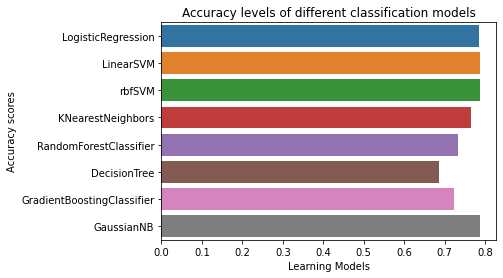

In [63]:
from sklearn.tree import DecisionTreeClassifier
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']
import seaborn as sns
import matplotlib.pyplot as plt
acc_score=[]

for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc_score.append(accuracy_score(pred,y_test))
     
d={'Model':model_names,'Accuracy':acc_score}

acc_table=pd.DataFrame(d)
acc_table

sns.barplot(y='Model',x='Accuracy',data=acc_table)
plt.xlabel('Learning Models')
plt.ylabel('Accuracy scores')
plt.title('Accuracy levels of different classification models')